In [2]:
from snowflake.snowpark import Session
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def create_snowpark_session():
    session = Session.builder.configs(st.secrets["snowpark"]).create()
    return session

In [4]:
session = create_snowpark_session()

In [5]:
silver_price = session.table("SILVER_PRICE_ANALYTICS").to_pandas()
print(silver_price.head(3))

                 NAME          ISIN                   LEI COUNTRY SECTOR  \
0               ORPEA  FR0000184798  969500LHIH3NT7PK1V89      FR   HLTH   
1  SOPRA STERIA GROUP  FR0000050809  96950020QIOHAAK9V551      FR   TECH   
2               REXEL  FR0010451203  969500N6AVPA51648T62      FR   DSCR   

          SECTOR_LONGNAME SUBSECTOR      SUBSECTOR_LONGNAME INDUSTRY  \
0    HEALTH CARE SERVICES      HLTH    HEALTH CARE SERVICES     HCFC   
1              TECHNOLOGY      INFO  INFORMATION TECHNOLOGY     COMS   
2  CONSUMER DISCRETIONARY      CPRO        CONSUMER PRODUCT     CELC   

                      INDUSTRY_LONGNAME  ...      G         TIMESTAMP  \
0                HEALTH CARE FACILITIES  ...  53.33  1554711477744000   
1  COMPUTER SERVICES SOFTWARE & SYSTEMS  ...  56.33  1554711480376000   
2                  CONSUMER ELECTRONICS  ...  65.67  1554711482632000   

         OBNAME  PRICE  QUANTITY VOLUME                      EXTID1  \
0  FR0000184798     10        24    240  n

In [9]:
def get_x_y_entity(val, time_val):
    final_df = silver_price[silver_price['NAME'] == val].filter(['TIMESTAMP', 'PRICE'])

    final_df['TIMESTAMP'] = pd.to_datetime(final_df['TIMESTAMP']/1000, unit='ms').astype('datetime64[ms]')

    final_df =final_df.groupby('TIMESTAMP', as_index=False, sort=False)['PRICE'].mean()


    final_df = final_df.sort_values('TIMESTAMP')

    final_df.TIMESTAMP = final_df.TIMESTAMP.dt.floor('30T').ffill()
    final_df = final_df.groupby('TIMESTAMP')['PRICE'].mean()

    final_df = final_df.between_time('07:00:00', '15:00:00')
    
    final_df = final_df.reset_index()
    final_df['TIMESTAMP']=final_df['TIMESTAMP'].astype(str)
    final_df = final_df.set_index('TIMESTAMP')
                          

    xpoints = list(final_df.index)
    
    ypoints = list(final_df['PRICE'].values)

    return xpoints, ypoints


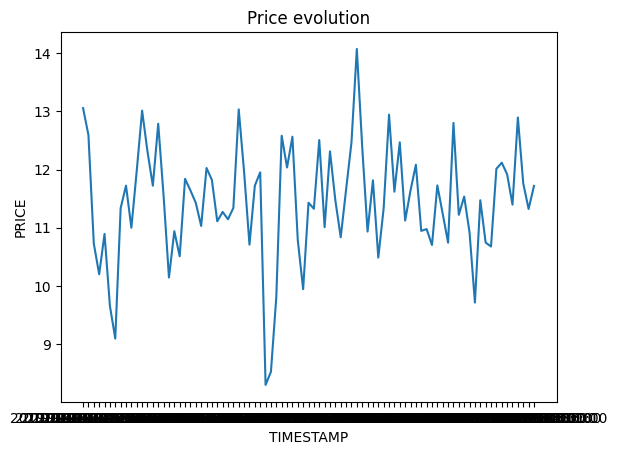

In [10]:
entity = 'AXA'
time_val ='30'
xpoints, ypoints= get_x_y_entity(entity, time_val) 


plt.plot(xpoints, ypoints)
plt.title('Price evolution')
plt.xlabel('TIMESTAMP')
plt.ylabel('PRICE')
plt.show()

